In [1]:
# Load contents of the raw EEG time-series data

from scipy.io import loadmat
data = loadmat('Matlab/eeg_data.mat')

In [2]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'eeg_data'])

In [3]:
eeg_data = data['eeg_data']
print(eeg_data.shape) # 1 trial epoch, 24 channels, 724638 time samples

(24, 724638)


In [4]:
# Load channel information

channels = loadmat('Matlab/channel_names.mat')
channels.keys()

dict_keys(['__header__', '__version__', '__globals__', 'channelNames'])

In [5]:
channel_names = channels['channelNames']
print(channel_names) # 24 channels

[[array(['Fp1'], dtype='<U3') array(['Fp2'], dtype='<U3')
  array(['F3'], dtype='<U2') array(['F4'], dtype='<U2')
  array(['C3'], dtype='<U2') array(['C4'], dtype='<U2')
  array(['P3'], dtype='<U2') array(['P4'], dtype='<U2')
  array(['O1'], dtype='<U2') array(['O2'], dtype='<U2')
  array(['F7'], dtype='<U2') array(['F8'], dtype='<U2')
  array(['FC3'], dtype='<U3') array(['FC4'], dtype='<U3')
  array(['P7'], dtype='<U2') array(['P8'], dtype='<U2')
  array(['Fz'], dtype='<U2') array(['Cz'], dtype='<U2')
  array(['Pz'], dtype='<U2') array(['FCz'], dtype='<U3')
  array(['Oz'], dtype='<U2') array(['AFz'], dtype='<U3')
  array(['CPz'], dtype='<U3') array(['POz'], dtype='<U3')]]


In [7]:
# AFz channel visualiztion before processing epochs

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['agg.path.chunksize'] = 10000

In [8]:
eeg_data = eeg_data[:,:716000]
print("Shape after removing the blip at the end: ", eeg_data.shape)

Shape after removing the blip at the end:  (24, 716000)


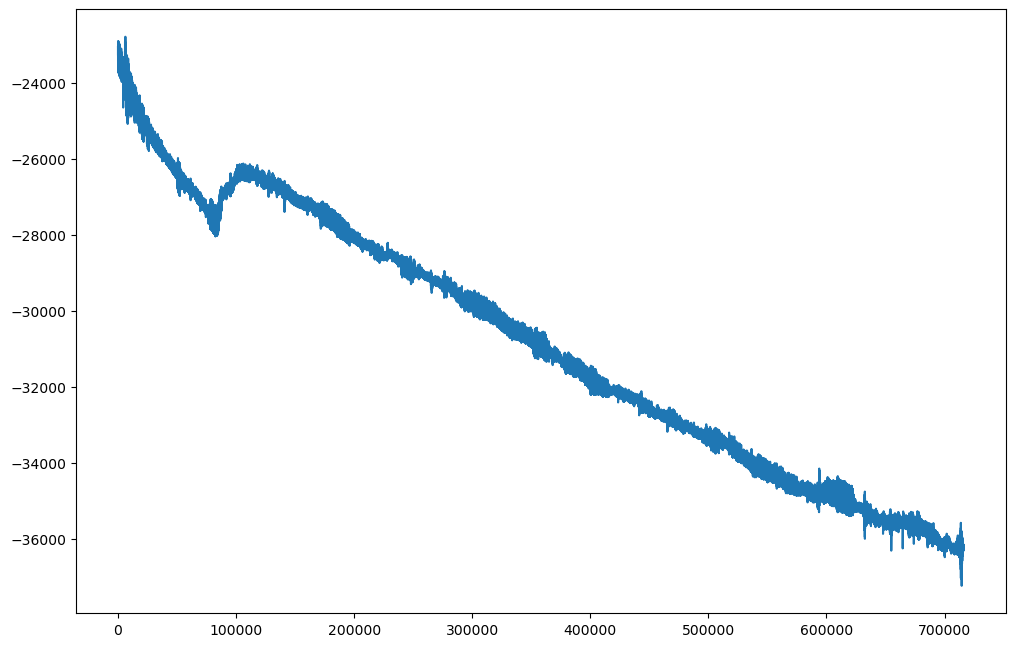

In [10]:
AFz = eeg_data[21] # AFz channel - removed the blip at the end
x = np.arange(1, 716001)
y = AFz
plt.plot(x, y, label = 'before-processing')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.show()

In [11]:
# Pre-processing for each epoch

from process import *
from parameters import *

In [12]:
# Processing without channel projection

num_trials = 1
epochs = []
for i in range(num_trials):
    eeg = eeg_data
    epoch = preproc1epoch(eeg)
    # print(epoch.shape)
    epochs.append(epoch)

No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-1--0.100-7159.896-PCA-01
Adding projection: eeg-1--0.100-7159.896-PCA-02
Adding projection: eeg-1--0.100-7159.896-PCA-03
Adding projection: eeg-1--0.100-7159.896-PCA-04
Adding projection: eeg-1--0.100-7159.896-PCA-05
Adding projection: eeg-1--0.100-7159.896-PCA-06
Adding projection: eeg-1--0.100-7159.896-PCA-07
Adding projection: eeg-1--0.100-7159.896-PCA-08
Adding projection: eeg-1--0.100-7159.896-PCA-09
Adding projection: eeg-1--0.100-7159.896-PCA-10
3 projection items deactivated
Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


In [13]:
print(len(epochs))
print(epochs[0].shape)

1
(20, 1790000)


In [14]:
# Plot after preocessing

AFz_ = epochs[0][17] # AFz = 18th channel after channel rejection
len(AFz_) # 2.5 times the original length 

1790000

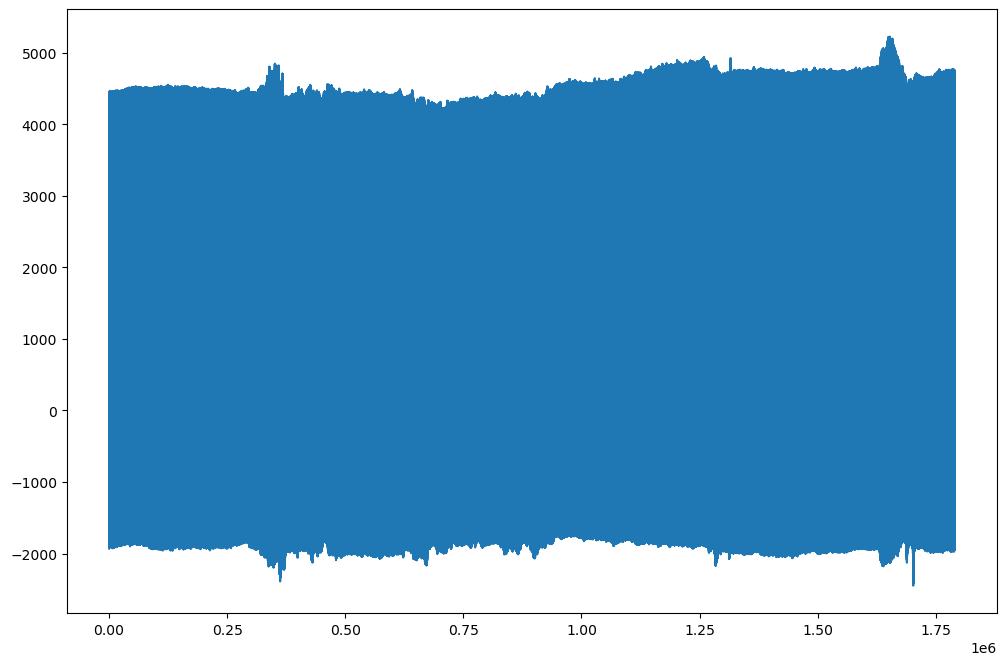

In [16]:
x = np.arange(1, 1790001)
y = AFz_
plt.plot(x, y, label = 'after-processing')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.show()

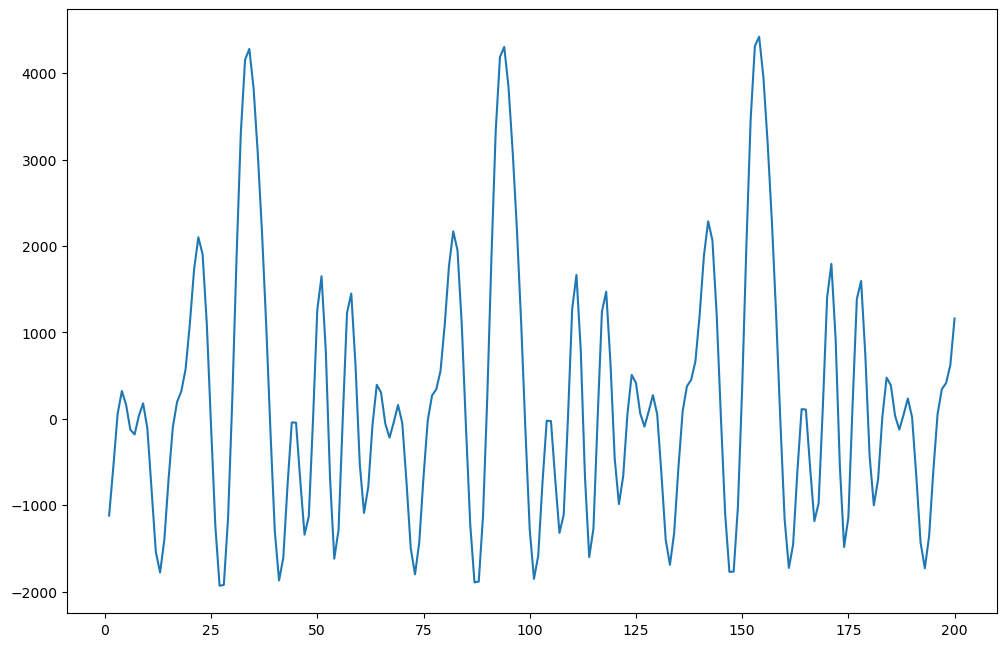

In [17]:
# 1st 200 time samples only 
x = np.arange(1, 201)
y = AFz_[:200]
plt.plot(x, y, label = 'first-200-samples')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.show()

In [23]:
# Zooming into signals to observe eye blinks

def plot(start, end):
    x = np.arange(1, 251)
    y = AFz_[start:end]
    plt.plot(x, y)
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100 
    plt.show()

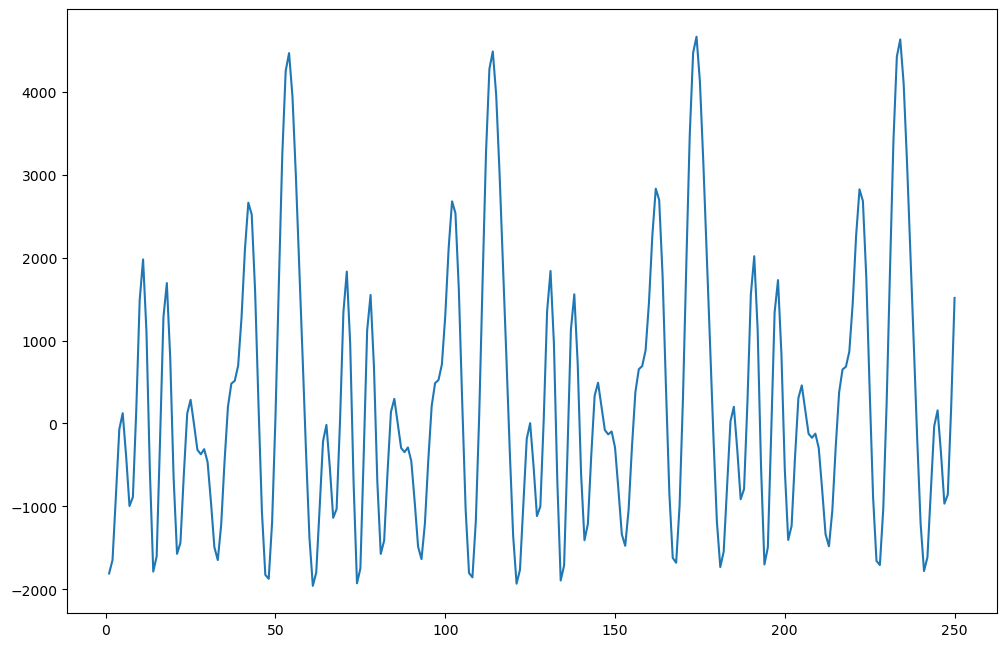

In [24]:
plot(1750000, 1750250)

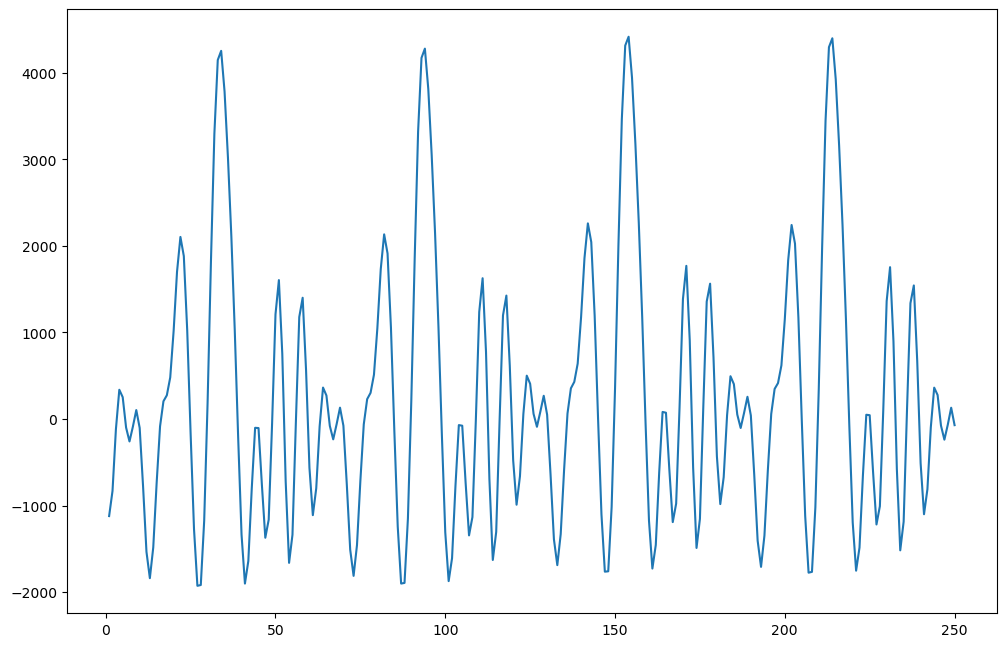

In [25]:
plot(7500, 7750)